<a href="https://colab.research.google.com/github/arsh-1432/face-detection/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
import cv2  #open cv library used in image processing, object detection, and video analysis

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib #can be used to create various types of plots and visualizations

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode  # decodes a base64-encoded string into its original binary data.

def take_photo(filename='photo.jpg', quality=0.8):  # take_photo that allows you to capture a photo using the webcam
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');  //The <div> element will be used as a container to hold the webcam stream and the capture button.
        const capture = document.createElement('button'); //This button will be used to trigger the capture of a photo from the webcam.
        capture.textContent = 'Capture'; // Sets the text content of the capture button (capture) to 'Capture'. This text will be displayed on the button.
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);  //The captured image is converted to a Base64-encoded JPEG image using canvas.toDataURL('image/jpeg', quality)
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


<IPython.core.display.Javascript object>

Saved to photo.jpg


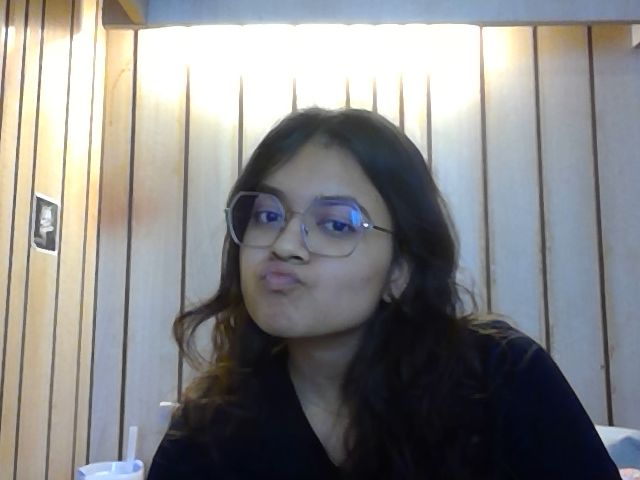

In [ ]:
from IPython.display import Image
try:
    filename = take_photo()    # The returned value is the filename where the photo is saved.
    print('Saved to {}'.format(filename))
    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))


In [ ]:
import cv2

img = cv2.imread('photo.jpg')  # Loads the image 'photo.jpg' using OpenCV's imread() function. The image is loaded in BGR (Blue-Green-Red) color format.
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #Converts the BGR image (img) to grayscale (gray_img) using cv2.cvtColor().
#This step is essential for face detection, as many algorithms operate on grayscale images.


#Loads the Haar cascade classifier for detecting
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# detect all the faces in the image
faces = face_cascade.detectMultiScale(gray_img,1.1,4)
#1.1: Scale factor. Specifies how much the image size is reduced at each image scale.
#4: Minimum number of neighbor rectangles that make up an object (in this case, faces).


# print the number of faces detected
print(f"{len(faces)} faces detected in the image.")



1 faces detected in the image.


In [ ]:
# for every face, draw a green rectangle
for x, y, width, height in faces:
  cv2.rectangle(img, (x,y), (x + width, y + height), color=(0,255,255), thickness=2)

#img: The image on which the rectangles will be drawn.
#(x, y): Coordinates of the top-left corner of the rectangle (starting point).
#(x + width, y + height): Coordinates of the bottom-right corner of the rectangle (ending point).
#color=(0, 255, 255): Specifies the color of the rectangle as a tuple (B, G, R).
#thickness=2: Specifies the thickness of the rectangle's border (in pixels)


In [ ]:
# save the image with rectangles
cv2.imwrite("photo_detected.jpg",img)

True